# This is version to aspect term extraction and aspect category detection using SATLabel framework
https://www.researchgate.net/publication/359792164_SATLabel_A_Framework_for_Sentiment_and_Aspect_Terms_Based_Automatic_Topic_Labeling

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from collections import Counter
import numpy as np
from nltk import pos_tag
import pandas as pd

In [2]:
# read preprocess dataset
df = pd.read_csv('dataset/movies_20k.csv')

In [3]:
df.head()

,index,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,5,A terrible movie as everyone has said. What ma...,0


In [2]:
# Make sure to download the necessary NLTK data files
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

# Preprocess tweets
def preprocess(tweet):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(tweet.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

def aspect_sentiment(text):
    # Tokenisasi teks menjadi kata-kata individual
    tokens = word_tokenize(text)
    # Ambil daftar stop words dalam bahasa Inggris dari NLTK
    stop_words = set(stopwords.words('english'))
    # Hapus tanda baca dan ubah menjadi huruf kecil
    tokens = [word.lower() for word in tokens if word.isalnum()]
    # Tag POS pada token
    pos_tags = pos_tag(tokens)
    # Buat daftar istilah sentimen dan aspek
    sentiment_terms = []
    aspect_terms = []
    # Iterasi melalui token
    for word, tag in pos_tags:
        # Cek apakah kata tersebut merupakan stop word
        if word in stop_words:
            continue
        # Cek apakah kata tersebut merupakan adjektiva atau verba (istilah sentimen)
        if tag.startswith('JJ') or tag.startswith('VB'):
            sentiment_terms.append(word)
        # Cek apakah kata tersebut merupakan nomina (istilah aspek)
        elif tag.startswith('NN'):
            aspect_terms.append(word)
    # Menghapus duplikat dari istilah sentimen dan aspek
    sentiment_terms = list(set(sentiment_terms))
    aspect_terms = list(set(aspect_terms))
    return sentiment_terms, aspect_terms

In [5]:
tweets = df['text'].tolist()

In [12]:
# Extract sentiment and aspect terms for each tweet
data = []
for tweet in tweets:
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)
    data.append({
        "Sample Tweet": tweet,
        "Sentiment Terms": ", ".join(sentiment_terms),
        "Aspect Terms": ", ".join(aspect_terms)
    })

# Create a DataFrame to display the results
df_AS = pd.DataFrame(data)
df_AS


,Sample Tweet,Sentiment Terms,Aspect Terms
0,I grew up (b. 1965) watching and loving the Th...,"became, loved, huge, get, counting, cgi, chair...","theme, score, waste, art, school, child, serie..."
1,"When I put this movie in my DVD player, and sa...","last, following, enjoyed, bad, excellent, let,...","whatever, series, review, atlantis, reviews, v..."
2,Why do people who do not know what a particula...,"replace, go, let, define, running, looks, next...","trash, moonlanding, slut, feel, meanies, compo..."
3,Even though I have great interest in Biblical ...,"biblical, bad, horrible, mixing, great, get, s...","death, point, horror, sanity, joke, everything..."
4,A terrible movie as everyone has said. What ma...,"giving, bad, murdered, made, mcnealy, antitrus...","laugh, record, front, award, involvement, publ..."
...,...,...,...
19995,"Again, I've read all of the comments posted he...","intelligent, excellent, convert, loved, increa...","living, plague, syndrome, grants, industry, ad..."
19996,This is without a doubt the funniest of the Cu...,"musical, perfect, funniest, dozens, shorts, hi...","times, doubt, comedy, stooges, example, pantom..."
19997,I first saw Thief as a child which makes me al...,"realized, korda, amazing, passed, delighted, g...","thomas, kid, years, child, mccarthy, timeless,..."
19998,This is a very fine and poetic story. Beautifu...,"japanese, last, let, gave, typical, want, poet...","colors, year, feel, score, screen, feelings, m..."


In [17]:
df_AS.to_csv('dataset/movies_24k_as.csv')

In [3]:
# Buat kamus dan matriks dokumen-term
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from collections import Counter

In [4]:
preprocess_df = pd.read_csv('dataset/preprocess_movies_20k.csv')
reviews = preprocess_df['text'].apply(word_tokenize)
tweets = preprocess_df['text'].tolist()

In [5]:
# corpus = [" ".join(preprocess(text)) for text in reviews]

dictionary = corpora.Dictionary(reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews]

In [6]:
# Lakukan LDA
lda_model = models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=10)

In [7]:
topics

[(0,
  '0.022*"film" + 0.020*"movie" + 0.010*"one" + 0.006*"like" + 0.006*"time" + 0.006*"character" + 0.006*"story" + 0.005*"great" + 0.005*"would" + 0.005*"see"'),
 (1,
  '0.013*"movie" + 0.010*"like" + 0.008*"one" + 0.008*"film" + 0.007*"show" + 0.006*"good" + 0.006*"character" + 0.005*"get" + 0.005*"even" + 0.004*"really"'),
 (2,
  '0.013*"film" + 0.006*"one" + 0.004*"character" + 0.004*"story" + 0.003*"like" + 0.003*"time" + 0.003*"also" + 0.003*"life" + 0.003*"performance" + 0.002*"scene"'),
 (3,
  '0.021*"movie" + 0.014*"film" + 0.009*"one" + 0.007*"like" + 0.006*"good" + 0.005*"really" + 0.005*"get" + 0.005*"even" + 0.005*"time" + 0.005*"bad"'),
 (4,
  '0.020*"movie" + 0.009*"one" + 0.005*"film" + 0.005*"like" + 0.004*"would" + 0.004*"time" + 0.004*"get" + 0.003*"good" + 0.003*"first" + 0.003*"make"')]

In [8]:
# Buat klaster per teks dari topik
sentiment_clusters = []
aspect_clusters = []
teks_cluster = []
for tweet in tweets:
    tokens = preprocess(tweet)
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)

    bow = dictionary.doc2bow(tokens)
    topic_distribution = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    teks_cluster.append((tweet, dominant_topic)) 
    # sentiment_clusters teks dan topic dominan dari teks tersebut
    sentiment_clusters.append((sentiment_terms, dominant_topic)) 
    # aspect_cluster teks dan topic dominan dari teks tersebut
    aspect_clusters.append((aspect_terms, dominant_topic))

In [9]:
aspect_terms

['use',
 'hesitate',
 'war',
 'school',
 'belt',
 'talent',
 'orange',
 'luggage',
 'cinema',
 'fear',
 'compare',
 'story',
 'tom',
 'role',
 'hope',
 'emotion',
 'nick',
 'field',
 'world',
 'friend',
 'care',
 'lot',
 'william',
 'others',
 'performance',
 'thomas',
 'son',
 'manner',
 'mention',
 'village',
 'masterpiece',
 'robinson',
 'refuse',
 'life',
 'mom',
 'sense',
 'host',
 'zac',
 'mister',
 'discovers',
 'stay',
 'man',
 'london',
 'watching',
 'air',
 'goodnight',
 'instruction',
 'time',
 'happiness',
 'john',
 'responsibility',
 'letter',
 'cry',
 'lad',
 'sadness',
 'childhood',
 'mine',
 'movie',
 'tobr',
 'boy',
 'accepts',
 'rest',
 'thaw',
 'send',
 'choice',
 'home',
 'review']

In [10]:
# Buat klaster berdasarkan topik dominan dari seluruh sentiment cluster masing-masing teks
# Untuk suatu topic, term yang menyusunnya apa saja
sentiment_clusters_by_topic = [[] for _ in range(5)]
aspect_clusters_by_topic = [[] for _ in range(5)]

for terms, topic in sentiment_clusters:
    sentiment_clusters_by_topic[topic].extend(terms)
for terms, topic in aspect_clusters:
    aspect_clusters_by_topic[topic].extend(terms)

In [11]:
teks_cluster_by_topic = [[] for _ in range(5)]
for teks, topic in teks_cluster:
    teks_cluster_by_topic[topic].append(teks)

In [12]:
# Tentukan istilah yang paling umum dalam klaster
def top_unigrams(cluster):
    counter = Counter(cluster)
    # return counter.most_common(1)[0][0] if counter else ""
    return [term for term, _ in counter.most_common(20)]

sentiment_unigrams = [top_unigrams(cluster) for cluster in sentiment_clusters_by_topic]
aspect_unigrams = [top_unigrams(cluster) for cluster in aspect_clusters_by_topic]

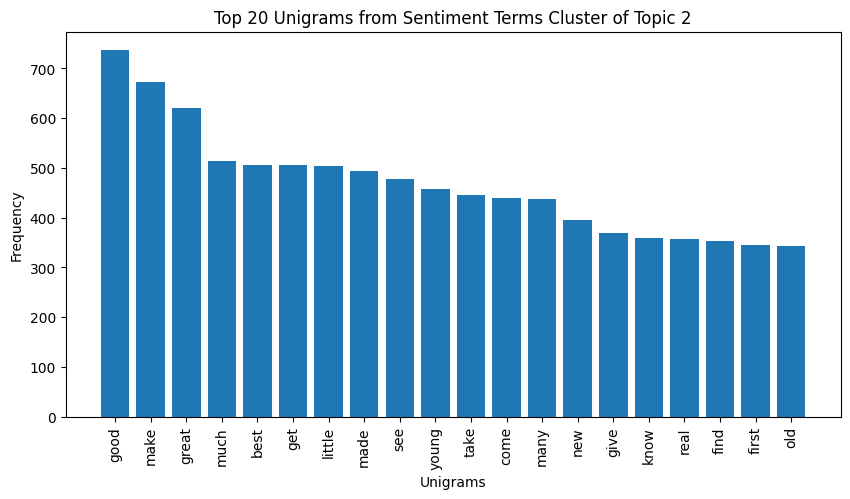

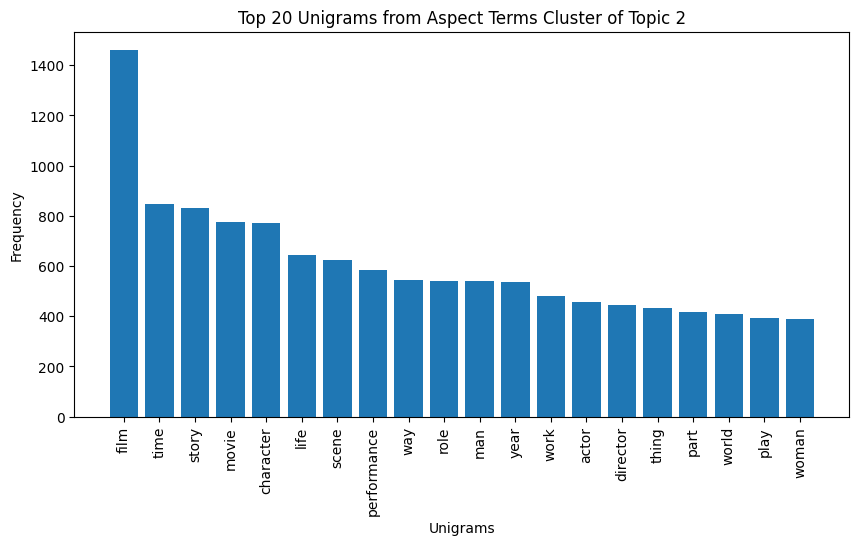

In [13]:
import matplotlib.pyplot as plt
# Menampilkan grafik Top 20 unigrams dari klaster istilah sentimen untuk topik nomor 12
topic_number = 2
if topic_number < len(sentiment_clusters_by_topic) and topic_number < len(aspect_clusters_by_topic):
    sentiment_counter = Counter(sentiment_clusters_by_topic[topic_number])
    aspect_counter = Counter(aspect_clusters_by_topic[topic_number])
    
    most_common_sentiment_unigrams = sentiment_counter.most_common(20)
    most_common_aspect_unigrams = aspect_counter.most_common(20)
    
    # Plot sentiment unigrams
    words_sentiment, counts_sentiment = zip(*most_common_sentiment_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_sentiment, counts_sentiment)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Sentiment Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot aspect unigrams
    words_aspect, counts_aspect = zip(*most_common_aspect_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_aspect, counts_aspect)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Aspect Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Topic number {topic_number} is out of range.")

In [14]:
# Label topik
topic_labels = []
tfidf_vectorizer = TfidfVectorizer()
combined_terms = [" ".join(cluster) for cluster in sentiment_clusters_by_topic + aspect_clusters_by_topic]
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_terms)

In [15]:
from itertools import product
# Menghasilkan kombinasi dari kedua daftar unigram
combined_pairs = list(product(aspect_unigrams[0], sentiment_unigrams[0]))

# Mengambil 400 pasangan kombinasi pertama
top_400_pairs = combined_pairs[:400]

print(top_400_pairs)

[('movie', 'good'), ('movie', 'great'), ('movie', 'make'), ('movie', 'see'), ('movie', 'made'), ('movie', 'many'), ('movie', 'seen'), ('movie', 'get'), ('movie', 'much'), ('movie', 'think'), ('movie', 'acting'), ('movie', 'say'), ('movie', 'best'), ('movie', 'know'), ('movie', 'bad'), ('movie', 'real'), ('movie', 'little'), ('movie', 'come'), ('movie', 'give'), ('movie', 'watching'), ('film', 'good'), ('film', 'great'), ('film', 'make'), ('film', 'see'), ('film', 'made'), ('film', 'many'), ('film', 'seen'), ('film', 'get'), ('film', 'much'), ('film', 'think'), ('film', 'acting'), ('film', 'say'), ('film', 'best'), ('film', 'know'), ('film', 'bad'), ('film', 'real'), ('film', 'little'), ('film', 'come'), ('film', 'give'), ('film', 'watching'), ('time', 'good'), ('time', 'great'), ('time', 'make'), ('time', 'see'), ('time', 'made'), ('time', 'many'), ('time', 'seen'), ('time', 'get'), ('time', 'much'), ('time', 'think'), ('time', 'acting'), ('time', 'say'), ('time', 'best'), ('time', 'kn

In [16]:
transformed = [' '.join(pair) for pair in top_400_pairs]
print(transformed)

['movie good', 'movie great', 'movie make', 'movie see', 'movie made', 'movie many', 'movie seen', 'movie get', 'movie much', 'movie think', 'movie acting', 'movie say', 'movie best', 'movie know', 'movie bad', 'movie real', 'movie little', 'movie come', 'movie give', 'movie watching', 'film good', 'film great', 'film make', 'film see', 'film made', 'film many', 'film seen', 'film get', 'film much', 'film think', 'film acting', 'film say', 'film best', 'film know', 'film bad', 'film real', 'film little', 'film come', 'film give', 'film watching', 'time good', 'time great', 'time make', 'time see', 'time made', 'time many', 'time seen', 'time get', 'time much', 'time think', 'time acting', 'time say', 'time best', 'time know', 'time bad', 'time real', 'time little', 'time come', 'time give', 'time watching', 'story good', 'story great', 'story make', 'story see', 'story made', 'story many', 'story seen', 'story get', 'story much', 'story think', 'story acting', 'story say', 'story best'

In [17]:
transformed_df = pd.DataFrame(transformed)
transformed_df.rename(columns={0: 'Pair'}, inplace=True)
transformed_df

,Pair
0,movie good
1,movie great
2,movie make
3,movie see
4,movie made
...,...
395,director real
396,director little
397,director come
398,director give


In [18]:
import re
topics = lda_model.show_topics()
cleaned_topics = []

for topic_id, topic_string in topics:
    # Menghapus angka, tanda bintang, tanda plus, dan tanda kutip ganda dari setiap topik
    cleaned_topic_string = re.sub(r'[\d\*\+\"\'\.]', '', topic_string)
    # Menambahkan topik yang sudah dibersihkan ke dalam daftar
    cleaned_topics.append((topic_id, cleaned_topic_string))

# Menampilkan topik yang sudah dibersihkan
for topic_id, topic_string in cleaned_topics:
    print(topic_id, topic_string)

0 film  movie  one  like  time  character  story  great  would  see
1 movie  like  one  film  show  good  character  get  even  really
2 film  one  character  story  like  time  also  life  performance  scene
3 movie  film  one  like  good  really  get  even  time  bad
4 movie  one  film  like  would  time  get  good  first  make


In [19]:
topics_df = pd.DataFrame(cleaned_topics)
topics_df.rename(columns={0: 'Topics', 1: 'Keywords'}, inplace=True)
topics_df

,Topics,Keywords
0,0,film movie one like time character story...
1,1,movie like one film show good character ...
2,2,film one character story like time also ...
3,3,movie film one like good really get eve...
4,4,movie one film like would time get good...


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_cosine_similarity(tfidf_matrix, topic_vector):
    return cosine_similarity(tfidf_matrix, topic_vector)

# Vectorize the terms using TfidfVectorizer
vectorizer = TfidfVectorizer()
topics_tfidf_matrix = vectorizer.fit_transform(topics_df['Keywords'])
pair_tfidf_matrix = vectorizer.transform(transformed_df['Pair'])

# Calculate cosine similarity for each review and topic
similarities = calculate_cosine_similarity(topics_tfidf_matrix, pair_tfidf_matrix)

In [40]:
len(similarities)

5

In [41]:
# Create a DataFrame to store the similarities
similarities_df = pd.DataFrame(similarities, columns=transformed_df['Pair'])

# Add review_id to the DataFrame for reference
# similarities_df['review_id'] = review['review_id']

# Display the resulting DataFrame
similarities_df

Pair,movie good,movie great,movie make,movie see,movie made,movie many,movie seen,movie get,movie much,movie think,...,director acting,director say,director best,director know,director bad,director real,director little,director come,director give,director watching
0,0.161128,0.509932,0.122858,0.509932,0.250298,0.250298,0.250298,0.161128,0.250298,0.250298,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.406025,0.128295,0.128295,0.128295,0.261376,0.261376,0.261376,0.406025,0.261376,0.261376,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.411878,0.130145,0.130145,0.130145,0.265145,0.265145,0.265145,0.411878,0.265145,0.265145,...,0.0,0.0,0.0,0.0,0.47063,0.0,0.0,0.0,0.0,0.0
4,0.396823,0.125388,0.520434,0.125388,0.255453,0.255453,0.255453,0.396823,0.255453,0.255453,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [42]:
# Find the index of the maximum similarity for each review
max_similarity_index = similarities.argmax(axis=1)

In [43]:
max_similarity_index

array([ 61,  80, 144,  14,   2], dtype=int64)

In [47]:
# get label or column name
label_pair = []
for i in max_similarity_index:
    label_pair.append(transformed[i])

label_pair

['story great', 'character good', 'life made', 'movie bad', 'movie make']

In [48]:
# Concate max aspect similarity and review
df_single_aspect = pd.concat([topics_df['Keywords'], pd.DataFrame(label_pair)], axis=1)
df_single_aspect = df_single_aspect.rename(columns={0: 'Aspect'})
df_single_aspect

,Keywords,Aspect
0,film movie one like time character story...,story great
1,movie like one film show good character ...,character good
2,film one character story like time also ...,life made
3,movie film one like good really get eve...,movie bad
4,movie one film like would time get good...,movie make
